# Optymalizacja: Różne metody

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#Nasza funkcja celu

def Fcelu(x):
    x1, x2 = x
    return 4 * np.sin(np.pi * x1) + 6 * np.sin(np.pi * x2) + (x1 - 1)**2 + (x2 - 1)**2

#### Funkcja wizualizująca naszą funkcję celu w 3D

In [3]:
def pokaz_3D(Fcelu, zakres, spin=0):
  os_x1 = np.linspace(zakres[0], zakres[1], 50)
  os_x2 = np.linspace(zakres[2], zakres[3], 50)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)

  fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':'3d'})
  ax.plot_surface(siatka_X1, siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='twilight')
  ax.set_xlabel('x1', fontsize=14)
  ax.set_ylabel('x2', fontsize=14)
  ax.set_zlabel('F', fontsize=14)
  ax.azim += spin
  plt.show()


#### Funkcja wizualizująca naszą funkcję celu w 2D

In [4]:
def pokaz_2D(Fcelu, zakres):
  os_x1 = np.linspace(zakres[0], zakres[1], num=100)
  os_x2 = np.linspace(zakres[2], zakres[3], num=100)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
  macierz_Z = Fcelu([siatka_X1, siatka_X2])

  fig, ax = plt.subplots(figsize=(8,8))
  cplot = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 10, cmap='twilight', alpha=1)
  clines = ax.contour(siatka_X1, siatka_X2, macierz_Z, 10, colors='black')
  ax.set_aspect('equal')
  ax.set_xlabel(r'x1', fontsize=16)
  ax.set_ylabel(r'x2', fontsize=16)
  ax.clabel(clines)
  fig.colorbar(cplot)
  plt.show()

#### Zastosowanie obu

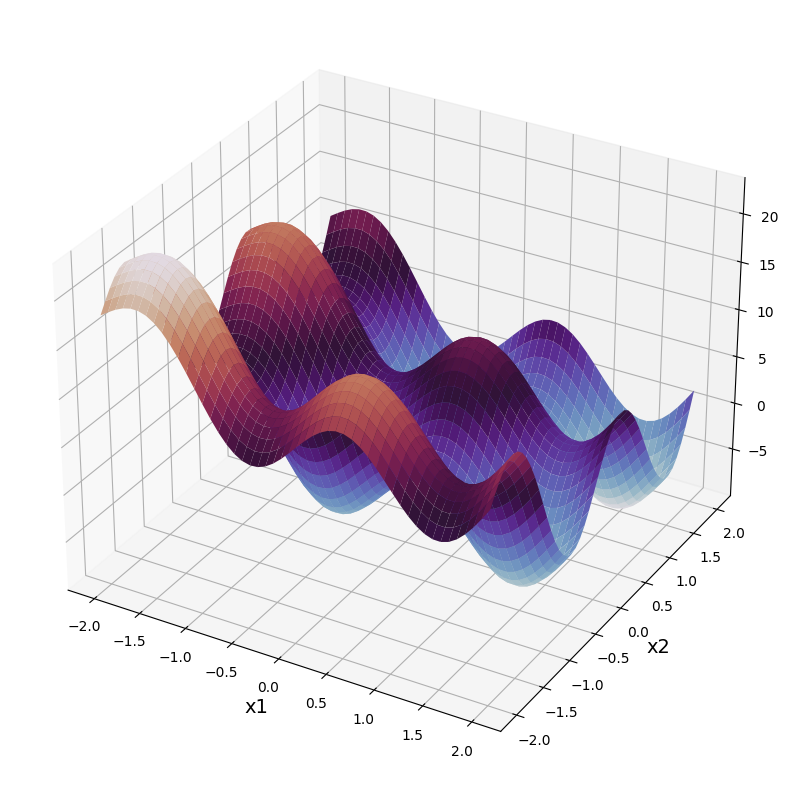

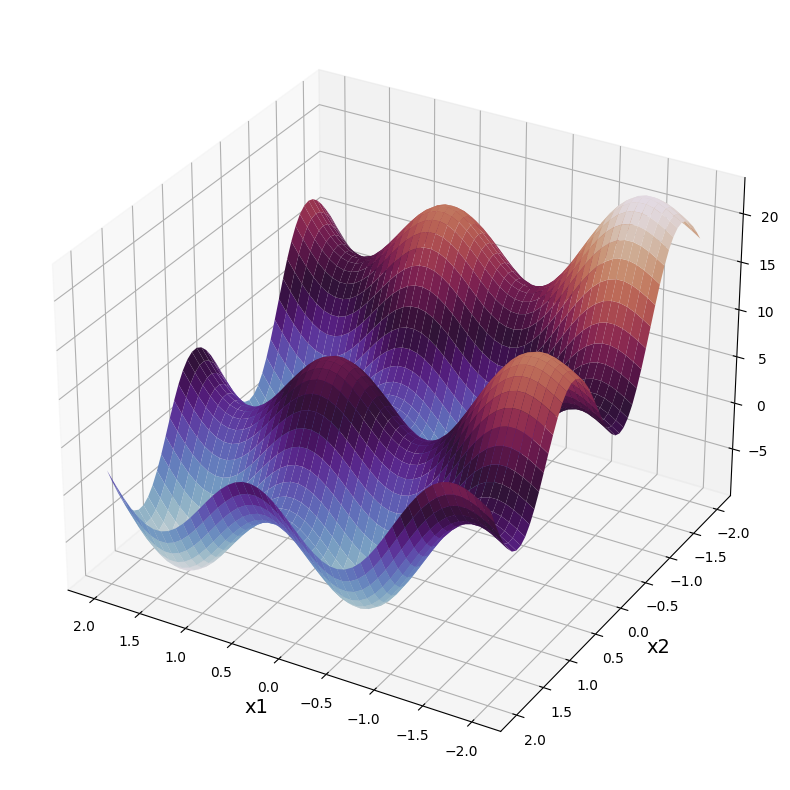

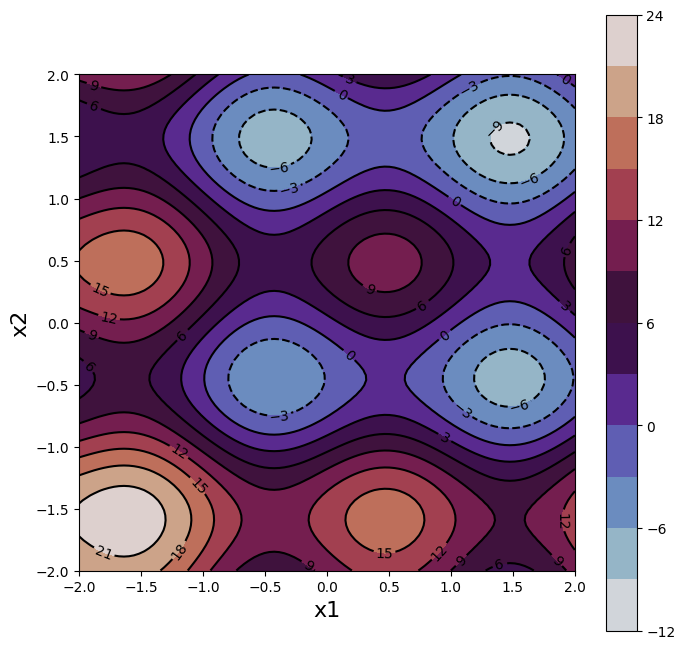

In [5]:
# bez obrotu
pokaz_3D(Fcelu, [-2, 2, -2, 2])
# z obrotem o 180 stopni
pokaz_3D(Fcelu, [-2, 2, -2, 2], spin=180)
# Forma kwadratowa
pokaz_2D(Fcelu, [-2, 2, -2, 2])

#### Teraz zmodyfikujemy nasze funkcje wyświetlające żeby przedstawiały proces optymalizacji

In [6]:
def pokaz_2D_opt(Fcelu, x_historia, zakres):
    x_pocz, x_opt = x_historia[0], x_historia[-1]
    os_x1 = np.linspace(zakres[0], zakres[1], num=100)
    os_x2 = np.linspace(zakres[2], zakres[3], num=100)
    siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
    macierz_Z = Fcelu([siatka_X1, siatka_X2])
    
    fig, ax = plt.subplots(figsize=(8,8))
    cplot = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 10, cmap='twilight', alpha=1)
    clines = ax.contour(siatka_X1, siatka_X2, macierz_Z, 10, colors='black')
    for punkt in x_historia:
        ax.plot(punkt[0], punkt[1], 'o', 
              color='white', markeredgecolor='black', markersize=5, alpha=0.7)
        ax.plot(x_pocz[0], x_pocz[1], 'd', 
              color='gray', markeredgecolor='black', markersize=10, alpha=0.7)    
        ax.plot(x_opt[0], x_opt[1], 'h', 
              color='white', markeredgecolor='black', markersize=15)
    ax.set_aspect('equal')
    ax.set_xlabel(r'x1', fontsize=16)
    ax.set_ylabel(r'x2', fontsize=16)
    ax.clabel(clines)
    fig.colorbar(cplot)
    plt.show()

In [9]:
def pokaz_3D_opt(Fcelu, x_historia, zakres, spin=0):
    x_pocz, x_opt = x_historia[0], x_historia[-1]
    os_x1 = np.linspace(zakres[0], zakres[1], 50)
    os_x2 = np.linspace(zakres[2], zakres[3], 50)
    siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
    
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection':'3d'})
    ax.plot_surface(siatka_X1, siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='twilight')
    for punkt in x_historia:
        ax.plot(punkt[0], punkt[1], 'o', 
              color='white', markeredgecolor='black', markersize=5, alpha=0.7)
        ax.plot(x_pocz[0], x_pocz[1], 'd', 
              color='gray', markeredgecolor='black', markersize=10, alpha=0.7)    
        ax.plot(x_opt[0], x_opt[1], 'h', 
              color='white', markeredgecolor='black', markersize=15)    
    ax.set_xlabel('x1', fontsize=14)
    ax.set_ylabel('x2', fontsize=14)
    ax.set_zlabel('F', fontsize=14)
    ax.azim += spin
    plt.show()

#### Przykładowe zastosowanie tego wykresu dla optymalizacji

Optimization terminated successfully.
         Current function value: -7.585710
         Iterations: 38
         Function evaluations: 72


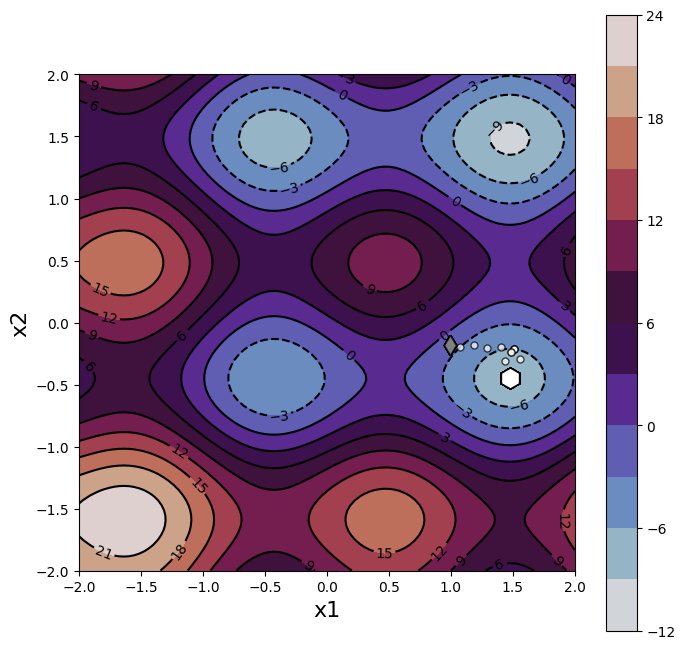

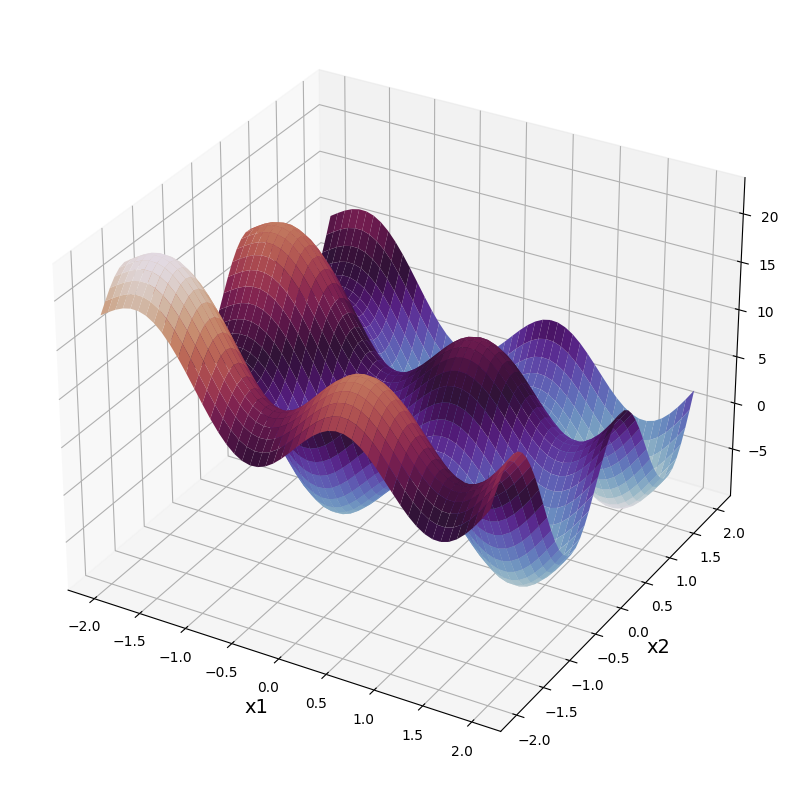

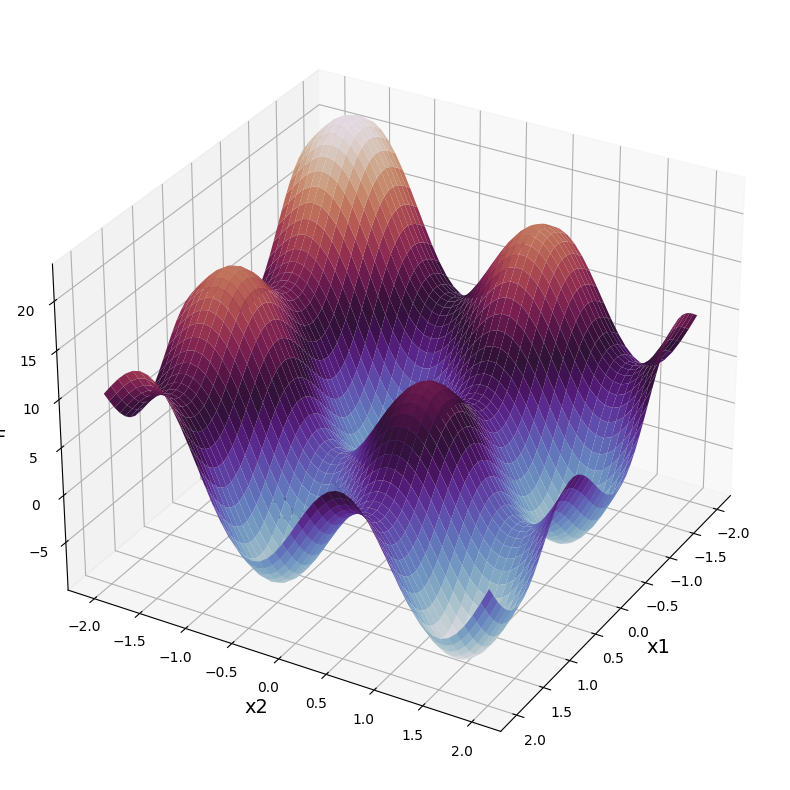

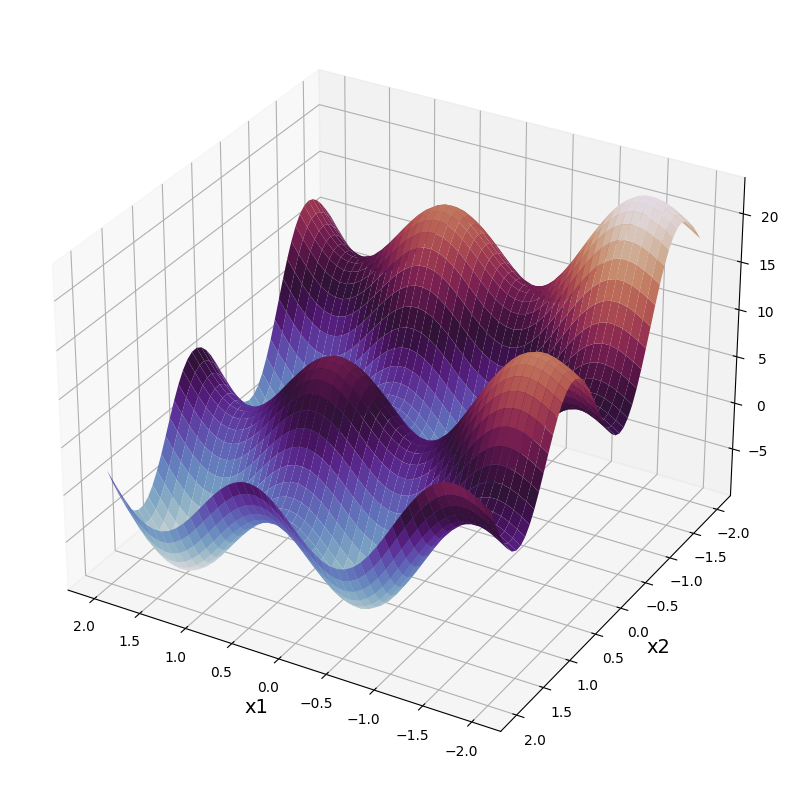

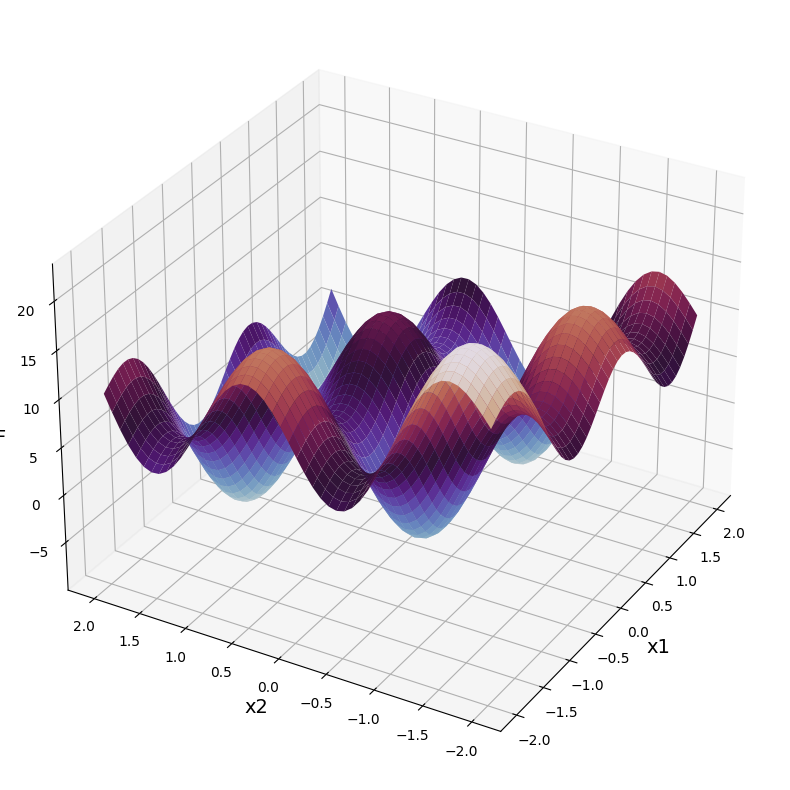

In [10]:
x_opt, x_historia = optimize.fmin(Fcelu,
                                  np.random.uniform(-1,1, size=2),
                                  retall=True)

zakres=[-2, 2, -2, 2]
pokaz_2D_opt(Fcelu, x_historia, zakres)
pokaz_3D_opt(Fcelu, x_historia, zakres)
pokaz_3D_opt(Fcelu, x_historia, zakres, spin=90)
pokaz_3D_opt(Fcelu, x_historia, zakres, spin=180)
pokaz_3D_opt(Fcelu, x_historia, zakres, spin=270)